This notebook require an installation of "lazypredict-nightly", which can be install as follows in a conda environment as follows:
- conda create --n ML python=3.9
- conda activate ML
- pip install lazypredict-nightly
- pip install openpyxl

In [1]:
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Set font properties for ticks
plt.rcParams['xtick.labelsize'] = 12  # Font size of x-axis tick labels
plt.rcParams['ytick.labelsize'] = 12  # Font size of y-axis tick labels

# Set font properties for labels
plt.rcParams['axes.labelsize'] = 15  # Font size of axis labels

# Set font properties for title
plt.rcParams['axes.titlesize'] = 17  # Font size of title
# plt.rcParams["font.family"] = 'Helvetica'

In [3]:
import os

os.getcwd()

'/home/rimella/PythonDirectory/Postdoc/ML_tunneling/ML_tunneling'

In [4]:
data = pd.read_excel("../data/Training_Dataset_2.xlsx")

data = data.values[:,1:]

X = data[:,:-1].astype(float)
mu = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
X = (X - mu)/std

y = data[:,-1]

y = np.where(y=="E",      np.zeros(y.shape), y)
y = np.where(y=="L",  1 + np.zeros(y.shape), y)
y = np.where(y=="L ", 1 + np.zeros(y.shape), y)
y = np.where(y=="R",  2 + np.zeros(y.shape), y)
y = np.where(y=="S",  3 + np.zeros(y.shape), y)
y = np.where(y=="W",  4 + np.zeros(y.shape), y)

y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lazy predict for model selection

In [5]:
from lazypredict import LazyClassifier

In [6]:
# Updated Line
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=True)

In [7]:
X_train_lazy, X_test_lazy, y_train_lazy, y_test_lazy = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

models, predictions = clf.fit(X_train_lazy, X_test_lazy, y_train_lazy, y_test_lazy)
models

  0%|          | 0/29 [00:00<?, ?it/s]

 97%|█████████▋| 28/29 [00:08<00:00,  1.85it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 3171, number of used features: 9
[LightGBM] [Info] Start training from score -1.024775
[LightGBM] [Info] Start training from score -1.285295
[LightGBM] [Info] Start training from score -3.217615
[LightGBM] [Info] Start training from score -1.605033
[LightGBM] [Info] Start training from score -2.090540
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:08<00:00,  3.43it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.93,0.90,None,0.93,3.26
LGBMClassifier,0.92,0.90,None,0.92,0.41
ExtraTreesClassifier,0.93,0.90,None,0.93,0.37
RandomForestClassifier,0.92,0.89,None,0.92,0.96
BaggingClassifier,0.90,0.87,None,0.90,0.37
LabelPropagation,0.89,0.85,None,0.89,0.51
LabelSpreading,0.89,0.85,None,0.89,0.62
DecisionTreeClassifier,0.87,0.83,None,0.87,0.06
ExtraTreeClassifier,0.85,0.82,None,0.85,0.01


# XGB Classifier

In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [9]:
booster_list = ["gbtree"]

n_estimators_list  = [25, 50, 100, 150]

eta_list = [0.01, 0.1, 1.]
max_depth_list = [5, 10, 30]

lambda_list = [0.0, 5.0, 10.]

max_leaves_list   = [0, 1, 5]

# accuracy_vector = -100 + np.zeros((len(booster_list), len(n_estimators_list), len(eta_list), len(max_depth_list), 
#                                    len(lambda_list), len(max_leaves_list) ))

# for i1 in range(len(booster_list)):
#     for i2 in range(len(n_estimators_list)):
#         for i3 in range(len(eta_list)):
#             for i4 in range(len(max_depth_list)):
#                 for i5 in range(len(lambda_list)):
#                         for i7 in range(len(max_leaves_list)):

#                                 clf = XGBClassifier(booster = booster_list[i1], 
#                                                     n_estimators = n_estimators_list[i2], 
#                                                     eta = eta_list[i3], 
#                                                     max_depth = max_depth_list[i4], 
#                                                     reg_lambda = lambda_list[i5], 
#                                                     max_leaves = max_leaves_list[i7],  
#                                                     random_state = 42)
                                
#                                 model = clf.fit(X_train, y_train)

#                                 # Predict the labels for the test set
#                                 y_pred = model.predict(X_test)

#                                 # Calculate accuracy
#                                 accuracy_vector[i1, i2, i3, i4, i5, i7] = accuracy_score(y_test, y_pred)

#                                 print("#####################")
#                                 print("booster ", booster_list[i1])
#                                 print("n_estimators ", n_estimators_list[i2])
#                                 print("eta ", eta_list[i3])
#                                 print("max_depth ", max_depth_list[i4])
#                                 print("lambda ", lambda_list[i5])
#                                 print("max_leaves ", max_leaves_list[i7])
#                                 print(accuracy_vector[i1, i2, i3, i4, i5, i7])

# np.save("accuracy_XGB.npy", accuracy_vector)

In [10]:
accuracy_vector_XGB = np.load("data/accuracy_XGB.npy")
max_index = np.unravel_index(np.argmax(accuracy_vector_XGB), accuracy_vector_XGB.shape)

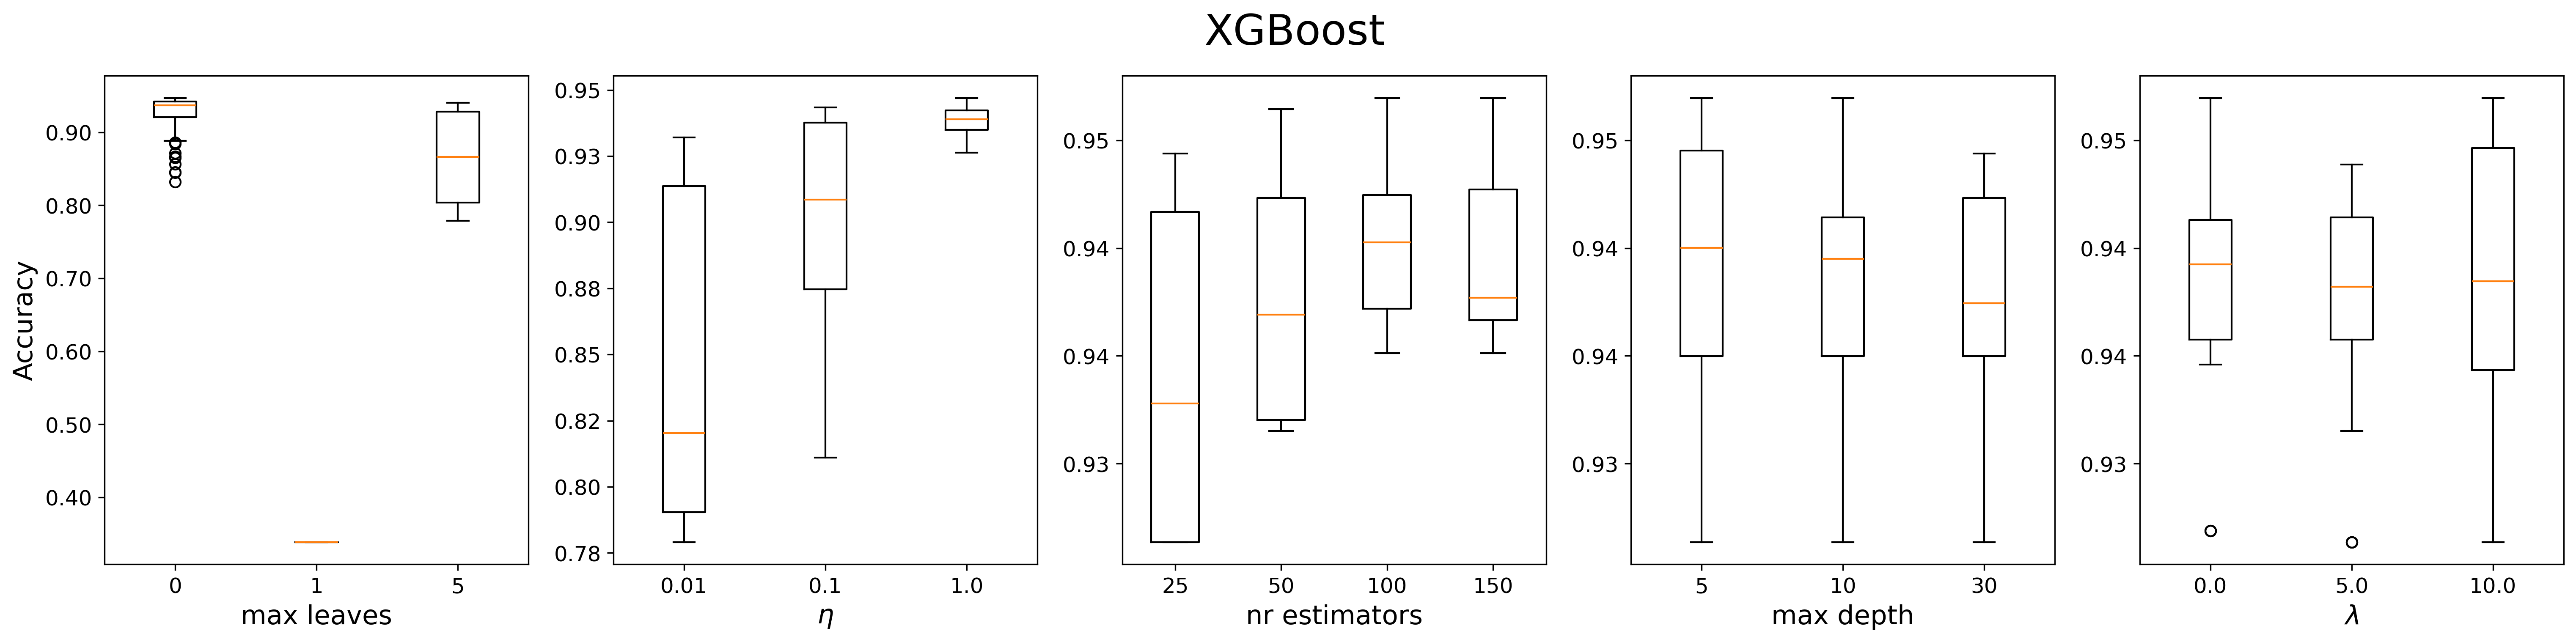

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (25, 5), dpi=300)

fig.suptitle('XGBoost', fontsize = 24)
	     
boxplot_5 = []
for i in range(accuracy_vector_XGB.shape[5]):
    boxplot_5.append(np.matrix.flatten(accuracy_vector_XGB[0,:,:,:,:,i]))
ax[0].boxplot(boxplot_5, labels = max_leaves_list)
ax[0].set_ylabel("Accuracy")
ax[0].set_xlabel("max leaves")
ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

boxplot_2 = []
for i in range(accuracy_vector_XGB.shape[2]):
    boxplot_2.append(np.matrix.flatten(accuracy_vector_XGB[0,:,i,...,[0,2]]))
ax[1].boxplot(boxplot_2, labels = eta_list)
# ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel(r"$\eta$")
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

boxplot_1 = []
for i in range(accuracy_vector_XGB.shape[1]):
    boxplot_1.append(np.matrix.flatten(accuracy_vector_XGB[0,i,2,...,[0,2]]))
ax[2].boxplot(boxplot_1, labels = n_estimators_list)
ax[2].set_xlabel(r"nr estimators")
ax[2].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

boxplot_3 = []
for i in range(accuracy_vector_XGB.shape[3]):
    boxplot_3.append(np.matrix.flatten(accuracy_vector_XGB[0,:,2,i,...,[0,2]]))
ax[3].boxplot(boxplot_3, labels = max_depth_list)
ax[3].set_xlabel(r"max depth")
ax[3].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

boxplot_4 = []
for i in range(accuracy_vector_XGB.shape[4]):
    boxplot_4.append(np.matrix.flatten(accuracy_vector_XGB[0,:,2,:,i,...,[0,2]]))
ax[4].boxplot(boxplot_4, labels = lambda_list)
ax[4].set_xlabel(r"$\lambda$")
ax[4].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

fig.savefig('data/figures/boxplots_XGB.png', bbox_inches="tight", dpi = 300)

In [12]:
clf = XGBClassifier(booster = booster_list[max_index[0]], 
                    n_estimators = n_estimators_list[max_index[1]], 
                    eta = eta_list[max_index[2]], 
                    max_depth = max_depth_list[max_index[3]], 
                    reg_lambda = lambda_list[max_index[4]], 
                    max_leaves = max_leaves_list[max_index[5]],  )

XGB = clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = XGB.predict(X_test)
accuracy_score(y_test, y_pred)

0.946961894953656

# ExtraTreesClassifier	

In [13]:
from sklearn.ensemble import ExtraTreesClassifier

In [14]:
n_estimators_list  = [25, 50, 100, 150]

min_samples_split_list = [1, 2, 5]
max_depth_list = [5, 10, 20, 30]

min_samples_leaf_list = [1, 2, 5]
criterion_list  = ["gini", "entropy"]


# accuracy_vector_extra_tree = -100 + np.zeros((len(n_estimators_list), len(min_samples_split_list), len(max_depth_list), 
#                                               len(min_samples_leaf_list), len(criterion_list) ))

# for i1 in range(len(n_estimators_list)):
#     for i2 in range(len(min_samples_split_list)):
#         for i3 in range(len(max_depth_list)):
#             for i4 in range(len(min_samples_leaf_list)):
#                 for i5 in range(len(criterion_list)):

#                                 clf = ExtraTreesClassifier( n_estimators = n_estimators_list[i1], 
#                                                             min_samples_split = min_samples_split_list[i2], 
#                                                             max_depth = max_depth_list[i3], 
#                                                             min_samples_leaf = min_samples_leaf_list[i4], 
#                                                             criterion = criterion_list[i5],  
#                                                             random_state = 42)
                                
#                                 model = clf.fit(X_train, y_train)

#                                 # Predict the labels for the test set
#                                 y_pred = model.predict(X_test)

#                                 # Calculate accuracy
#                                 accuracy_vector_extra_tree[i1, i2, i3, i4, i5] = accuracy_score(y_test, y_pred)

#                                 print("#####################")
#                                 print("n_estimators", n_estimators_list[i1])
#                                 print("min_samples_split", min_samples_split_list[i2])
#                                 print("max_depth", max_depth_list[i3])
#                                 print("min_samples_leaf", min_samples_leaf_list[i4])
#                                 print("criterion", criterion_list[i5])
#                                 print(accuracy_vector_extra_tree[i1, i2, i3, i4, i5])

# np.save("accuracy_ExtraTree.npy", accuracy_vector_extra_tree)

In [15]:
accuracy_vector_ExtraTree = np.load("data/accuracy_ExtraTree.npy")
max_index = np.unravel_index(np.argmax(accuracy_vector_ExtraTree), accuracy_vector_ExtraTree.shape)

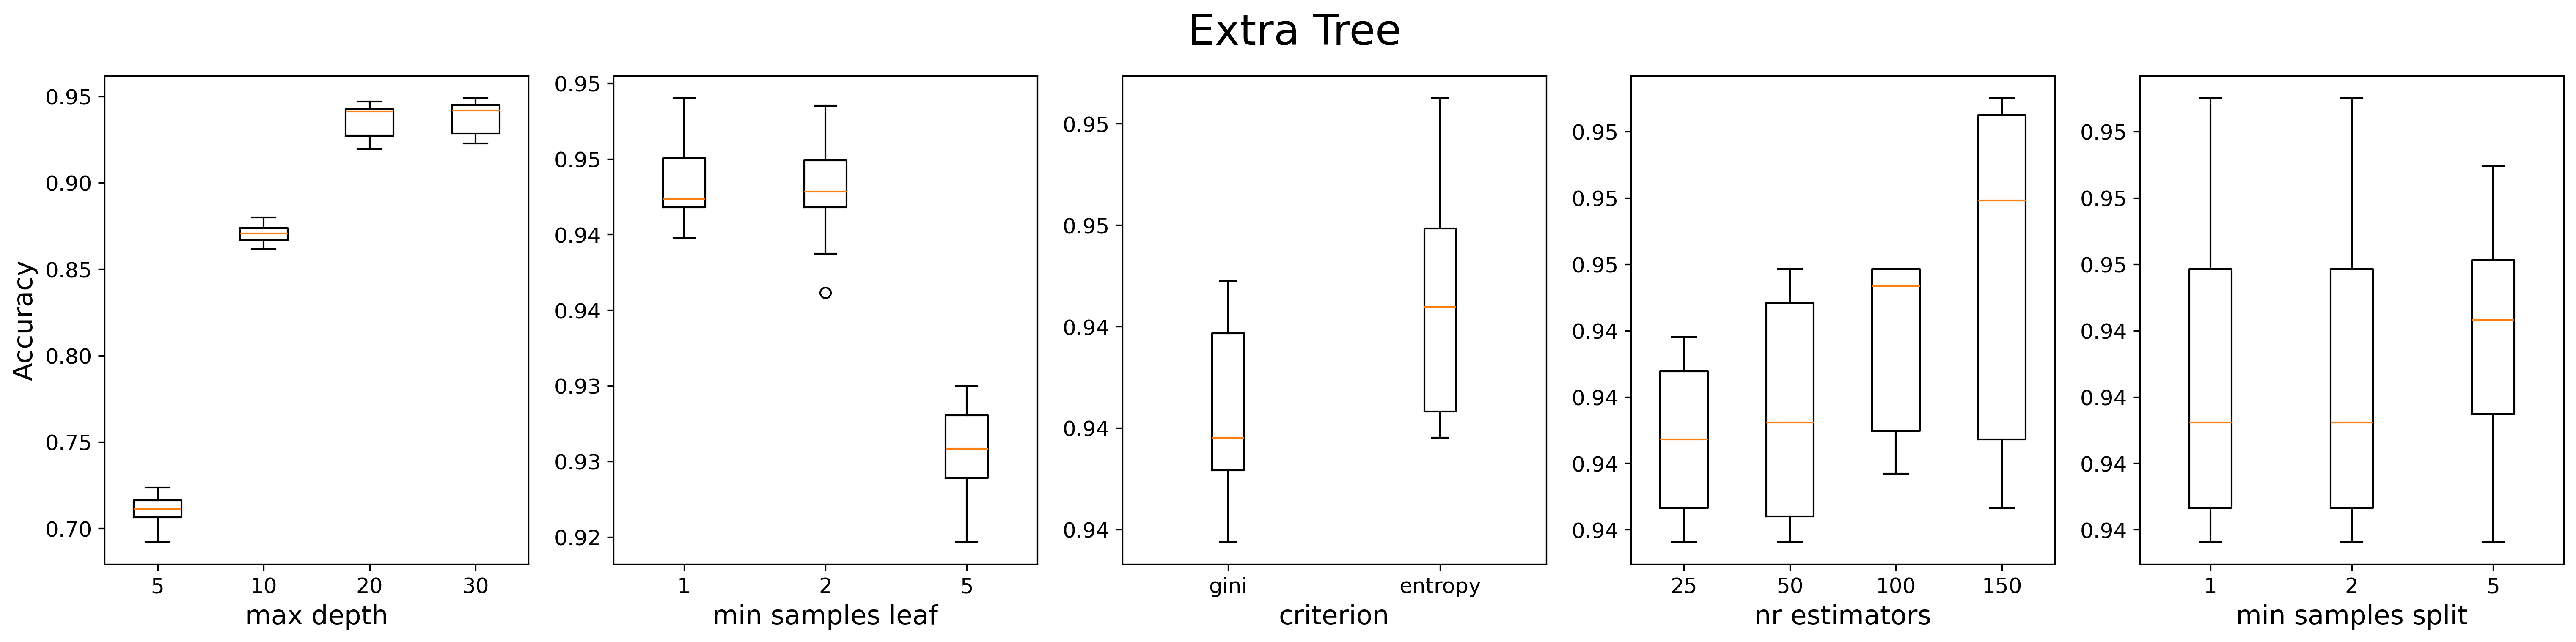

In [16]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (25, 5), dpi=300)

fig.suptitle('Extra Tree', fontsize = 24)

ax[0].set_ylabel("Accuracy")

boxplot_3 = []
for i in range(accuracy_vector_ExtraTree.shape[2]):
    boxplot_3.append(np.matrix.flatten(accuracy_vector_ExtraTree[:,:,i,:,:]))
ax[0].boxplot(boxplot_3, labels = max_depth_list)
ax[0].set_xlabel(r"max depth")
ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

boxplot_4 = []
for i in range(accuracy_vector_ExtraTree.shape[3]):
    boxplot_4.append(np.matrix.flatten(accuracy_vector_ExtraTree[:,:,[2,3],i,:]))
ax[1].boxplot(boxplot_4, labels = min_samples_leaf_list)
ax[1].set_xlabel(r"min samples leaf")
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

boxplot_5 = []
for i in range(accuracy_vector_ExtraTree.shape[4]):
    boxplot_5.append(np.matrix.flatten(accuracy_vector_ExtraTree[:,:,[2,3],[0,1],i]))
ax[2].boxplot(boxplot_5, labels = criterion_list)
ax[2].set_xlabel("criterion")
ax[2].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

boxplot_1 = []
for i in range(accuracy_vector_ExtraTree.shape[0]):
    boxplot_1.append(np.matrix.flatten(accuracy_vector_ExtraTree[i,:,[2,3],[0,1],1]))
ax[3].boxplot(boxplot_1, labels = n_estimators_list)
ax[3].set_xlabel(r"nr estimators")
ax[3].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

boxplot_2 = []
for i in range(accuracy_vector_ExtraTree.shape[1]):
    boxplot_2.append(np.matrix.flatten(accuracy_vector_ExtraTree[:,i,[2,3],[0,1],1]))
ax[4].boxplot(boxplot_2, labels = min_samples_split_list)
ax[4].set_xlabel(r"min samples split")
ax[4].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

fig.savefig('data/figures/boxplots_ExtraTree.png', bbox_inches="tight", dpi = 300)

In [17]:
clf = ExtraTreesClassifier( n_estimators = n_estimators_list[max_index[0]], 
                            min_samples_split = min_samples_split_list[max_index[1]], 
                            max_depth = max_depth_list[max_index[2]], 
                            min_samples_leaf = min_samples_leaf_list[max_index[3]], 
                            criterion = criterion_list[max_index[4]],  )

ExtraTree = clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = ExtraTree.predict(X_test)

# Calculate accuracy
accuracy_score(y_test, y_pred)

0.9459320288362513

# LGBM Classifier

In [18]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

In [19]:
num_leaves_list  = [10, 30 , 50]

n_estimators_list  = [25, 50, 100, 150]

learning_rate_list  = [0.01, 0.1, 1]
max_depth_list = [5, 10, 20, 30]

lambda_list = [0.0, 1.0, 5.0]
boosting_type_list  = ["gbdt"]

# accuracy_vector = -100 + np.zeros((len(num_leaves_list), len(n_estimators_list), len(learning_rate_list), len(max_depth_list), 
#                                    len(lambda_list), len(boosting_type_list) ))

# for i1 in range(len(num_leaves_list)):
#     for i2 in range(len(n_estimators_list)):
#         for i3 in range(len(learning_rate_list)):
#             for i4 in range(len(max_depth_list)):
#                 for i5 in range(len(lambda_list)):
#                     for i6 in range(len(boosting_type_list)):

#                                 clf = LGBMClassifier(num_leaves = num_leaves_list[i1], 
#                                                     n_estimators = n_estimators_list[i2], 
#                                                     learning_rate = learning_rate_list[i3], 
#                                                     max_depth = max_depth_list[i4], 
#                                                     reg_lambda = lambda_list[i5], 
#                                                     boosting_type = boosting_type_list[i6],   
#                                                     random_state=42)
                                
#                                 model = clf.fit(X_train, y_train)

#                                 # Predict the labels for the test set
#                                 y_pred = model.predict(X_test)

#                                 # Calculate accuracy
#                                 accuracy_vector[i1, i2, i3, i4, i5, i6] = accuracy_score(y_test, y_pred)

#                                 print("#####################")
#                                 print("booster ", boosting_type_list[i6])
#                                 print("n_estimators ", n_estimators_list[i2])
#                                 print("learning rate ", learning_rate_list[i3])
#                                 print("max_depth ", max_depth_list[i4])
#                                 print("lambda ", lambda_list[i5])
#                                 print("num_leaves ", num_leaves_list[i1])
#                                 print(accuracy_vector[i1, i2, i3, i4, i5, i6])

# np.save("accuracy_LGBM.npy", accuracy_vector)

In [20]:
accuracy_vector_LGBM = np.load("data/accuracy_LGBM.npy")
max_index = np.unravel_index(np.argmax(accuracy_vector_LGBM), accuracy_vector_LGBM.shape)

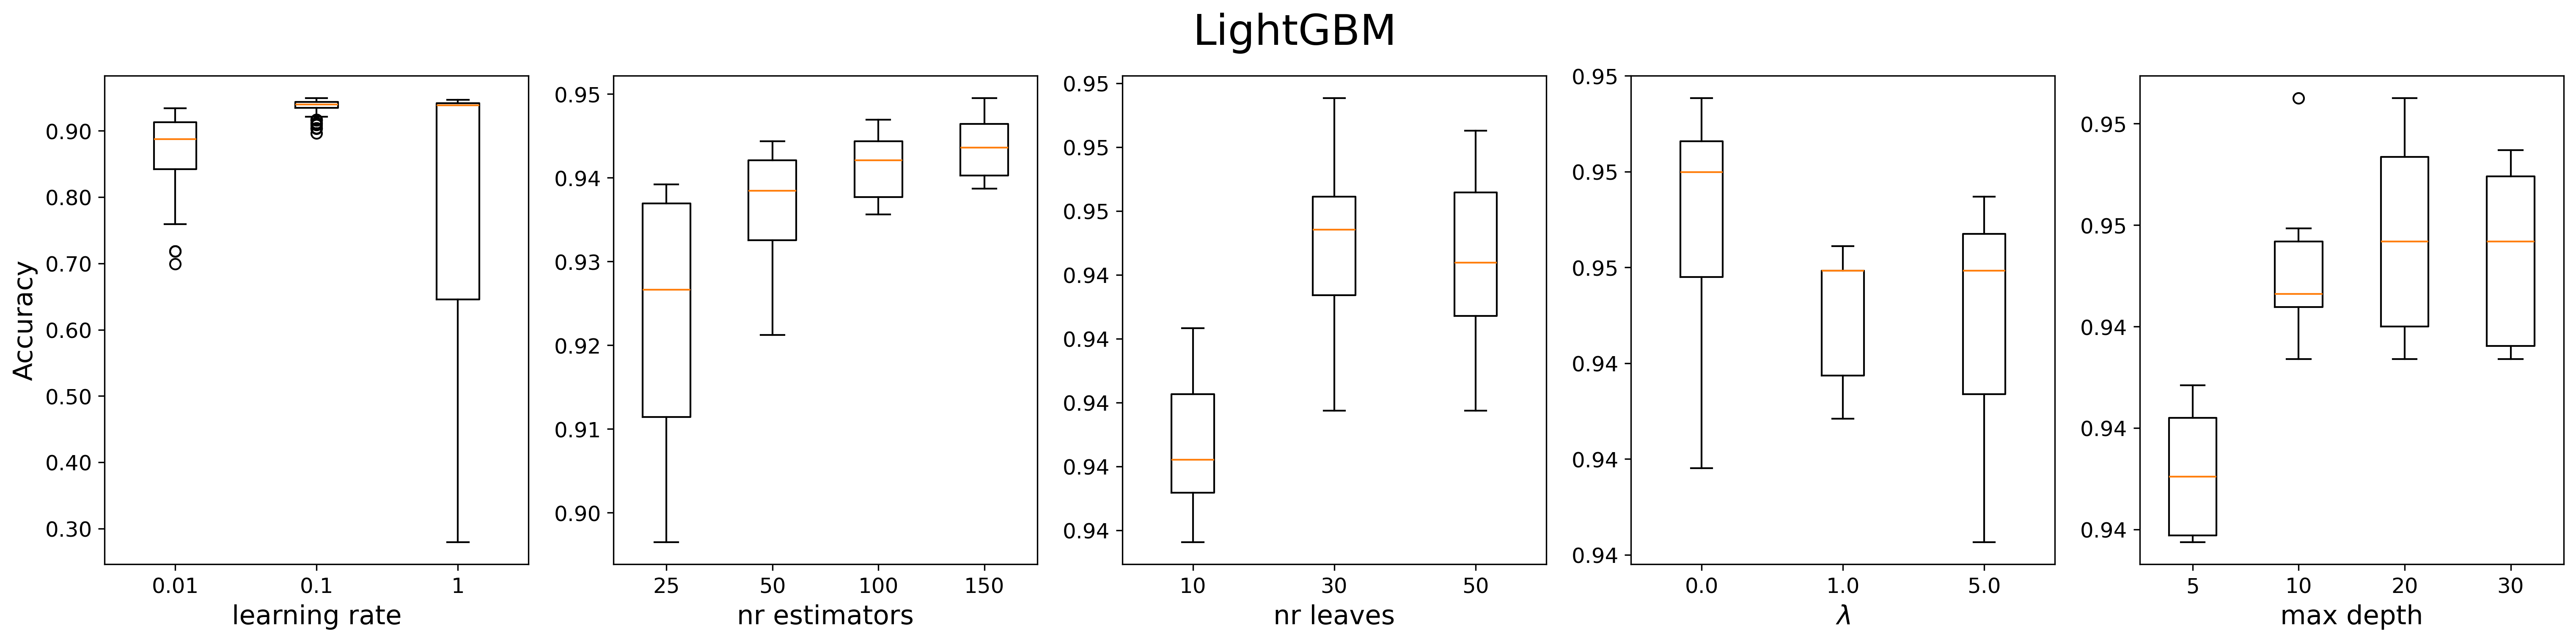

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (25, 5), dpi=300)

fig.suptitle('LightGBM', fontsize = 24)

ax[0].set_ylabel("Accuracy")

boxplot_3 = []
for i in range(accuracy_vector_LGBM.shape[2]):
    boxplot_3.append(np.matrix.flatten(accuracy_vector_LGBM[:,:,i,:,:,0]))
ax[0].boxplot(boxplot_3, labels = learning_rate_list)
ax[0].set_xlabel(r"learning rate")
ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

boxplot_2 = []
for i in range(accuracy_vector_LGBM.shape[1]):
    boxplot_2.append(np.matrix.flatten(accuracy_vector_LGBM[:,i,1,:,:,0]))
ax[1].boxplot(boxplot_2, labels = n_estimators_list)
ax[1].set_xlabel(r"nr estimators")
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

boxplot_1 = []
for i in range(accuracy_vector_LGBM.shape[0]):
    boxplot_1.append(np.matrix.flatten(accuracy_vector_LGBM[i,[2,3],1,:,:,0]))
ax[2].boxplot(boxplot_1, labels = num_leaves_list)
ax[2].set_xlabel(r"nr leaves")
ax[2].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

boxplot_5 = []
for i in range(accuracy_vector_LGBM.shape[4]):
    boxplot_5.append(np.matrix.flatten(accuracy_vector_LGBM[[1,2],3,1,:,i,0]))
ax[3].boxplot(boxplot_5, labels = lambda_list)
ax[3].set_xlabel(r"$\lambda$")
ax[3].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

boxplot_4 = []
for i in range(accuracy_vector_LGBM.shape[3]):
    boxplot_4.append(np.matrix.flatten(accuracy_vector_LGBM[[1,2],[2,3],1,i,:,0]))
ax[4].boxplot(boxplot_4, labels = max_depth_list)
ax[4].set_xlabel(r"max depth")
ax[4].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

fig.savefig('data/figures/boxplots_LGBM.png', bbox_inches="tight", dpi = 300)

In [22]:
clf = LGBMClassifier(num_leaves = num_leaves_list[max_index[0]], 
                    n_estimators = n_estimators_list[max_index[1]], 
                    learning_rate = learning_rate_list[max_index[2]], 
                    max_depth = max_depth_list[max_index[3]], 
                    reg_lambda = lambda_list[max_index[4]], 
                    boosting_type = boosting_type_list[max_index[5]], 
                    force_col_wise=True, verbose = -1   )

LGBM = clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = LGBM.predict(X_test)
accuracy_score(y_test, y_pred)

0.9495365602471678

## Random forest classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
data= []

n_estimators_list = [25, 50, 100, 150]
criterion_list = ["gini", "entropy"]
min_samples_leaf_list = [1, 2, 5, 10]
max_depth_list = ["None", 5, 10, 20, 30, 50] # this is for plotting
# max_depth_list = [None, 5, 10, 20, 30, 50] # this is for tuning

# accuracy_vector = -100 + np.zeros((len(n_estimators_list), len(criterion_list), len(min_samples_leaf_list), len(max_depth_list)))

# for i1 in range(len(n_estimators_list)):
#     for i2 in range(len(criterion_list)):
#         for i3 in range(len(min_samples_leaf_list)):
#             for i4 in range(len(max_depth_list)):
#                     clf = RandomForestClassifier(n_estimators = n_estimators_list[i1], 
#                                                  criterion    = criterion_list[i2], 
#                                                  min_samples_leaf = min_samples_leaf_list[i3], 
#                                                  max_depth        = max_depth_list[i4],
#                                                  random_state=42
#                                                  )
#                     model = clf.fit(X_train, y_train)

#                     # Predict the labels for the test set
#                     y_pred = model.predict(X_test)

#                     # Calculate accuracy
#                     accuracy_vector[i1, i2, i3, i4] = accuracy_score(y_test, y_pred)

#                     print("#####################")
#                     print("n_estimators ", n_estimators_list[i1])
#                     print("criterion ", criterion_list[i2])
#                     print("min sample leaf ", min_samples_leaf_list[i3])
#                     print("max_depth ", max_depth_list[i4])
#                     print(accuracy_vector[i1, i2, i3, i4])

# np.save("accuracy_RadomForest.npy", accuracy_vector)

In [25]:
accuracy_vector_RandomForest = np.load("data/accuracy_RadomForest.npy")
max_index = np.unravel_index(np.argmax(accuracy_vector_RandomForest), accuracy_vector_RandomForest.shape)
max_index

(2, 0, 1, 3)

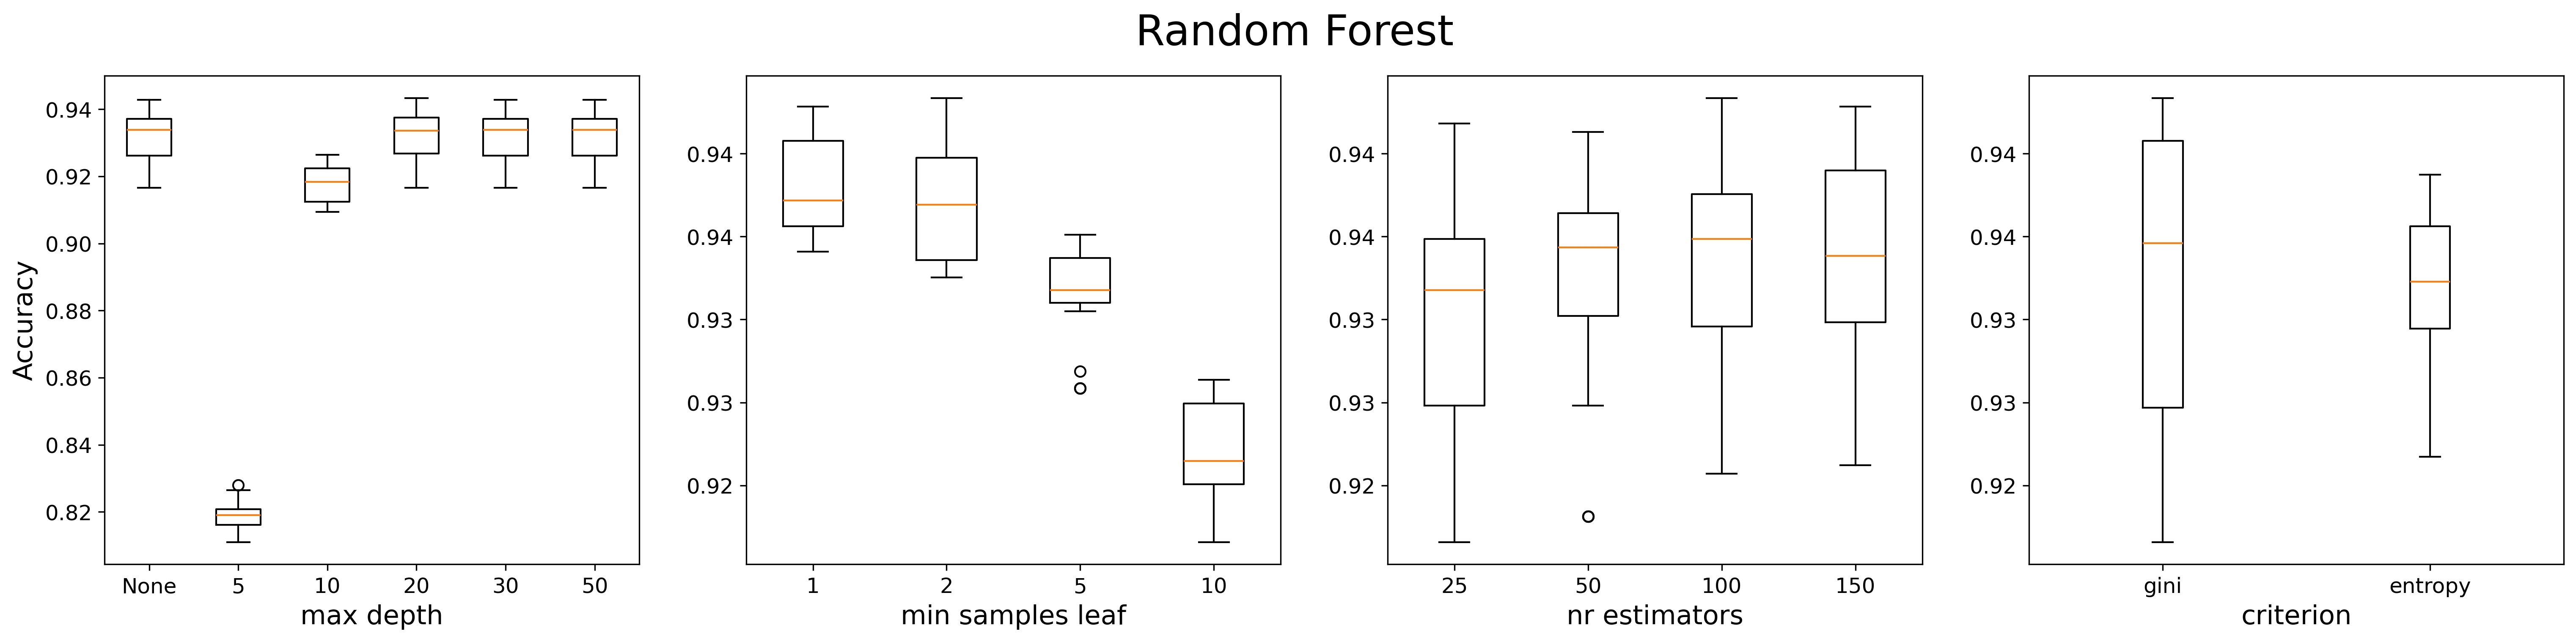

In [26]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (25, 5), dpi=300)

fig.suptitle('Random Forest', fontsize = 24)

ax[0].set_ylabel("Accuracy")

boxplot_4 = []
for i in range(accuracy_vector_RandomForest.shape[3]):
    boxplot_4.append(np.matrix.flatten(accuracy_vector_RandomForest[:,:,:,i]))
ax[0].boxplot(boxplot_4, labels = max_depth_list)
ax[0].set_xlabel(r"max depth")
ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

boxplot_3 = []
for i in range(accuracy_vector_RandomForest.shape[2]):
    boxplot_3.append(np.matrix.flatten(accuracy_vector_RandomForest[:,:,i,[0,3,4,5]]))
ax[1].boxplot(boxplot_3, labels = min_samples_leaf_list)
ax[1].set_xlabel(r"min samples leaf")
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

boxplot_2 = []
for i in range(accuracy_vector_RandomForest.shape[1]):
    boxplot_2.append(np.matrix.flatten(accuracy_vector_RandomForest[:,i,:,[0,3,4,5]]))
ax[3].boxplot(boxplot_2, labels = criterion_list)
ax[3].set_xlabel(r"criterion")
ax[3].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

boxplot_1 = []
for i in range(accuracy_vector_RandomForest.shape[0]):
    boxplot_1.append(np.matrix.flatten(accuracy_vector_RandomForest[i,:,:,[0,3,4,5]]))
ax[2].boxplot(boxplot_1, labels = n_estimators_list)
ax[2].set_xlabel(r"nr estimators")
ax[2].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

fig.savefig('data/figures/boxplots_RandomForest.png', bbox_inches="tight", dpi = 300)

In [27]:
clf = RandomForestClassifier( n_estimators     = n_estimators_list[max_index[0]], 
                              criterion        = criterion_list[max_index[1]], 
                              min_samples_leaf = min_samples_leaf_list[max_index[2]], 
                              max_depth        = max_depth_list[max_index[3]]
                            )

RF = clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = RF.predict(X_test)
accuracy_score(y_test, y_pred)

0.9407826982492276

## Ensemble method

In [45]:
XGB_pred = XGB.predict(X_test) 
ExtraTree_pred = ExtraTree.predict(X_test) 
LGBM_pred = LGBM.predict(X_test) 
RF_pred = RF.predict(X_test) 

predictions = np.stack((XGB_pred, ExtraTree_pred, LGBM_pred, RF_pred), axis = 1)
values      = np.unique(predictions)

boolean_check = np.expand_dims(predictions, axis = -1) == np.expand_dims(values, axis = (0, 1))
weights = np.expand_dims(np.expand_dims(np.array([1., 1., 1., 1.]), axis = 0), axis = -1)
ensemble_prediction_prob = np.mean(weights*boolean_check.astype(float), axis = -2)

Y_pred_ensemble = np.argmax(ensemble_prediction_prob, axis = 1)

accuracy_score(y_test, Y_pred_ensemble)

0.9505664263645726

# Neural Network

This part of the notebook requires an installation of tensorflow, follow the instructions from https://www.tensorflow.org/install

In [1]:
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

import tensorflow as tf

2024-05-28 10:37:11.606629: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-28 10:37:11.931469: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-28 10:37:11.931497: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-28 10:37:11.933865: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-28 10:37:12.082260: I tensorflow/core/platform/cpu_feature_g

In [2]:
data = pd.read_excel("../data/Training_Dataset_2.xlsx")

data = data.values[:,1:]

X = data[:,:-1].astype(float)
mu = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
X = (X - mu)/std

y = data[:,-1]

y = np.where(y=="E",      np.zeros(y.shape), y)
y = np.where(y=="L",  1 + np.zeros(y.shape), y)
y = np.where(y=="L ", 1 + np.zeros(y.shape), y)
y = np.where(y=="R",  2 + np.zeros(y.shape), y)
y = np.where(y=="S",  3 + np.zeros(y.shape), y)
y = np.where(y=="W",  4 + np.zeros(y.shape), y)

y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# Build the model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(4096, activation='relu'),
#     # tf.keras.layers.Dropout(0.3),  # Add dropout with a dropout rate of 0.5 (you can adjust this value)
#     tf.keras.layers.Dense(4096, activation='relu'),
#     # tf.keras.layers.Dropout(0.3),  # Add dropout with a dropout rate of 0.5 (you can adjust this value)
#     tf.keras.layers.Dense(5, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=500) #, validation_data=(X_test, y_test))

# model.save('NeuralNet.keras')

In [4]:
# File too big to be uploaded contact the authors if interested
model = tf.keras.models.load_model('NeuralNet.keras')

2024-05-28 10:37:17.239867: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-28 10:37:17.573876: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-28 10:37:17.573933: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-28 10:37:17.577546: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-28 10:37:17.577600: I tensorflow/compile

In [5]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


14/61 [=====>........................] - ETA: 0s - loss: 0.6674 - accuracy: 0.9442 

2024-05-28 10:37:19.627454: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


61/61 [==============================] - 1s 4ms/step - loss: 0.6976 - accuracy: 0.9413
Test accuracy: 0.9413
